# Interpolation

In [1]:
# Do some setups
from __future__ import print_function

import random
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path += ['..\\..\\']

import models
from tframe import console
from tframe.utils import imtool

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Get model
model = models.vanilla('vanilla_000')

>> Model built successfully:
... Generator: input_100 => fc_128 -> relu => fc_784 -> sigmoid => output_784
... Discriminator: input_784 => fc_128 -> relu => fc_1 -> sigmoid => output_1
>> Launching session ...
>> Session launched
>> Access to directory '.\records\checkpoints\vanilla_000' ...
INFO:tensorflow:Restoring parameters from .\records\checkpoints\vanilla_000\default.model-140625
>> Loaded default.model-140625


In [37]:
sample_num=50
z = model._random_z(sample_num)
samples = model.generate(z)
fig = imtool.gan_grid_plot(samples, show=True, h=5)

RuntimeError: Attempted to use a closed Session.

Choose 2 latent variables to interpolate

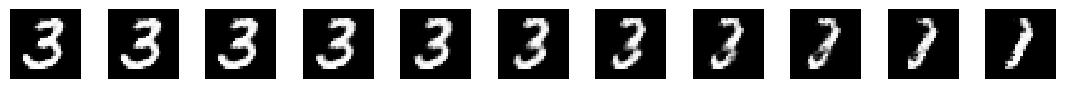

In [22]:
z1 = z[10]
z2 = z[0]
# Interpolate via straight line
fig = model.interpolate(z1, z2, via='linear', inter_num=8)

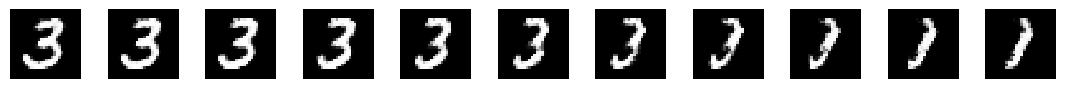

In [23]:
# Interpolate via great circle
fig = model.interpolate(z1, z2, via='spherical', inter_num=8)

In [36]:
# Shutdown session
model.shutdown()